In [2]:
import pandas as pd
import numpy as np

In [43]:
#Load in the dataframe and print out the columns

score_df = pd.read_csv('llm_responses_w_scores.csv')
score_df.columns

Index(['instruction', 'input', 'id', 'bactrian-x-answer', 'mistral_response',
       'mistral_relevance_score', 'mistral_coherence_score',
       'mistral_reasonable_answer', 'mistral_content_bonus_point',
       'mistral_vocab_score', 'mistral_bilingual_score',
       'mistral_subject_verb_score', 'mistral_word_order_score',
       'mistral_punctuation_score', 'mistral_grammar_score',
       'mistral_content_score', 'llama1_relevance_score',
       'llama1_coherence_score', 'llama1_reasonable_answer',
       'llama1_content_bonus_point', 'llama1_vocab_score',
       'llama1_bilingual_score', 'llama1_subject_verb_score',
       'llama1_word_order_score', 'llama1_punctuation_score',
       'llama1_grammar_score', 'llama1_content_score', 'llama1-response'],
      dtype='object')

In [5]:
# Make a sub-dataframe that only consists of the columns that contain strings relating to score. 
# If we could do it again, we'd name the columns more consistently so that we could use a more general approach to selecting the columns.

matching_cols = [col for col in score_df.columns if 'score' in col or 'point' in col or 'answer' in col]
isolated_score_df = score_df[matching_cols]

In [7]:
#That method almost worked perfectly, but pulled in the bactrian x answer column. We'll drop that column.

isolated_score_df.drop(columns=['bactrian-x-answer'], inplace=True)

C:\Users\arash\AppData\Local\Temp\ipykernel_16280\1275723484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated_score_df.drop(columns=['bactrian-x-answer'], inplace=True)


In [9]:
#Create a dictionary that maps each column's name to the mean of the column so that we can start taking a peek at the data
avg_score_dict = {col: isolated_score_df[col].mean() for col in isolated_score_df.columns}
avg_score_dict

In [ ]:
"""
Separate out the different scores into different categories:

Master category: content_score
Sub-categories: relevance_score, coherence_score (out of 2), reasonable_answer, content_bonus_point

Master category: grammar_score
Sub-categories: vocab_score, bilingual_score, subject_verb_score, punctuation, content_score

"""

In [17]:
#Desired final column names, to allow for comparison between the LLMs
content_col_list = ['content_score', 'relevance_score', 'coherence_score', 'reasonable_answer', 'content_bonus_point']
grammar_col_list = ['grammar_score', 'vocab_score', 'bilingual_score', 'subject_verb_score', 'punctuation_score', 'word_order_score']

In [18]:
mistral_content_cols = ['mistral_content_score', 'mistral_relevance_score', 'mistral_coherence_score', 'mistral_reasonable_answer', 'mistral_content_bonus_point']
mistral_content_df = isolated_score_df[mistral_content_cols]

# Renaming columns for clarity
mistral_content_df.columns = content_col_list


In [19]:
mistral_grammar_cols = ['mistral_grammar_score', 'mistral_vocab_score', 'mistral_bilingual_score', 'mistral_subject_verb_score', 'mistral_punctuation_score', 'mistral_word_order_score']
mistral_grammar_df = isolated_score_df[mistral_grammar_cols]

# Renaming columns for clarity
mistral_grammar_df.columns = grammar_col_list


In [20]:
#Repeat for llama1

llama1_content_cols = ['llama1_content_score', 'llama1_relevance_score', 'llama1_coherence_score', 'llama1_reasonable_answer', 'llama1_content_bonus_point']
llama1_content_df = isolated_score_df[llama1_content_cols]

# Renaming columns for clarity
llama1_content_df.columns = content_col_list



In [21]:
llama1_grammar_cols = ['llama1_grammar_score', 'llama1_vocab_score', 'llama1_bilingual_score', 'llama1_subject_verb_score', 'llama1_punctuation_score', 'llama1_word_order_score']

llama1_grammar_df = isolated_score_df[llama1_grammar_cols]
llama1_grammar_df.columns = grammar_col_list

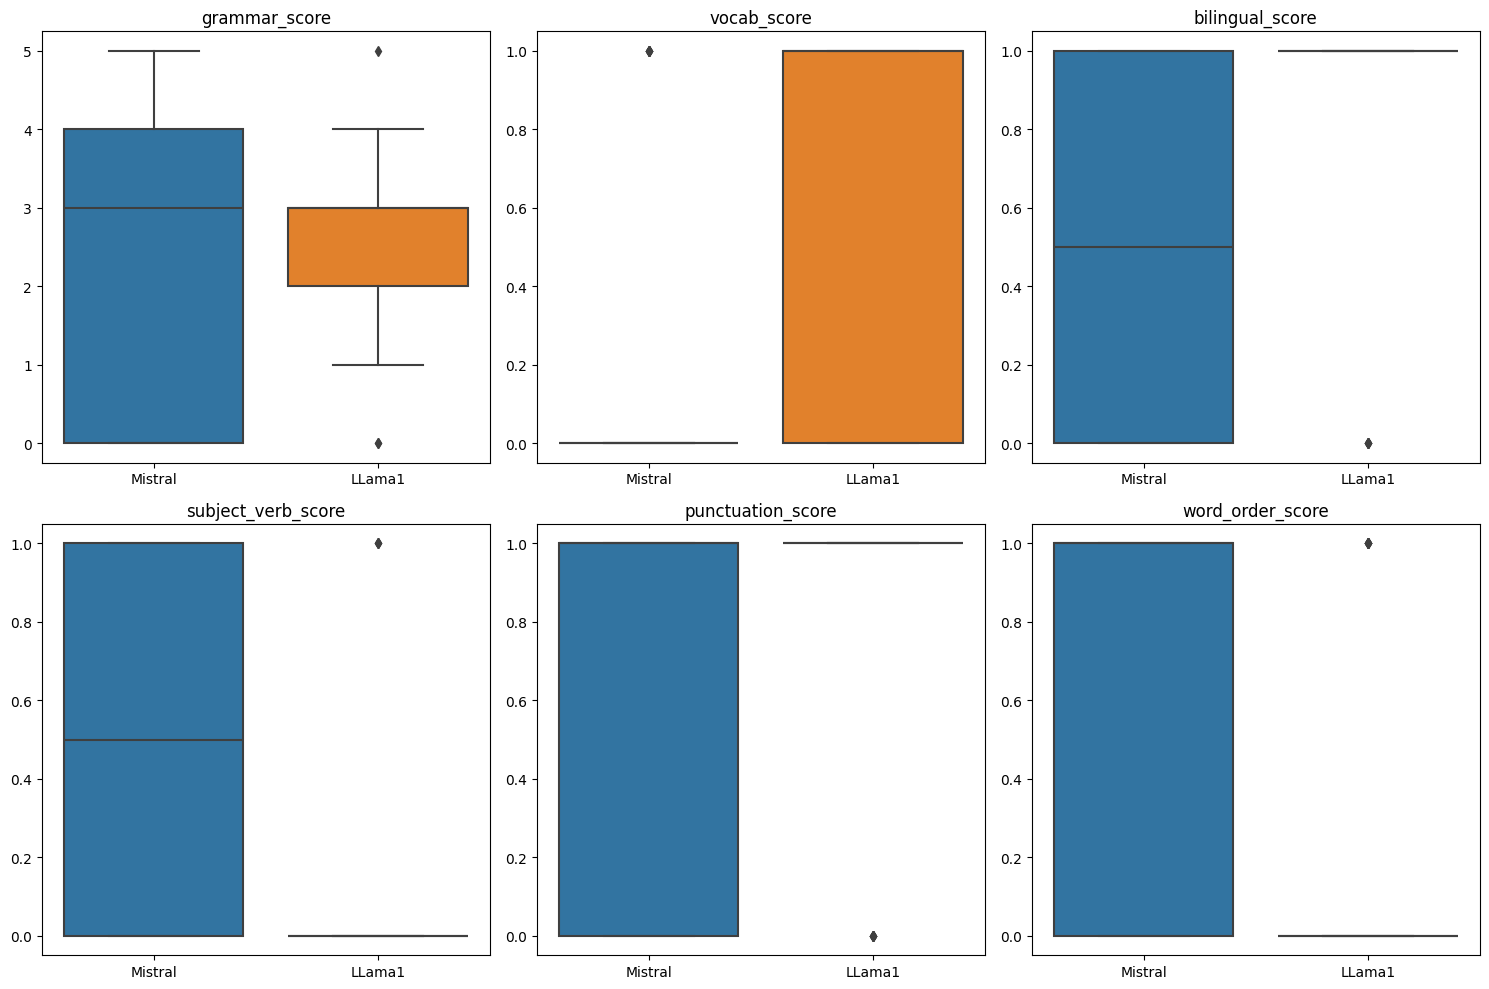

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the two dataframes for easier plotting
combined_df = pd.concat([mistral_grammar_df.add_prefix('Mistral_'), llama1_grammar_df.add_prefix('LLama1_')], axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each column (grammatical category)
for i, column in enumerate(grammar_col_list):
    ax = axes[i//3, i%3]
    sns.boxplot(data=combined_df[[f'Mistral_{column}', f'LLama1_{column}']], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(['Mistral', 'LLama1'])

plt.tight_layout()
plt.show()

In [34]:
grammar_df_avg = combined_df.mean()

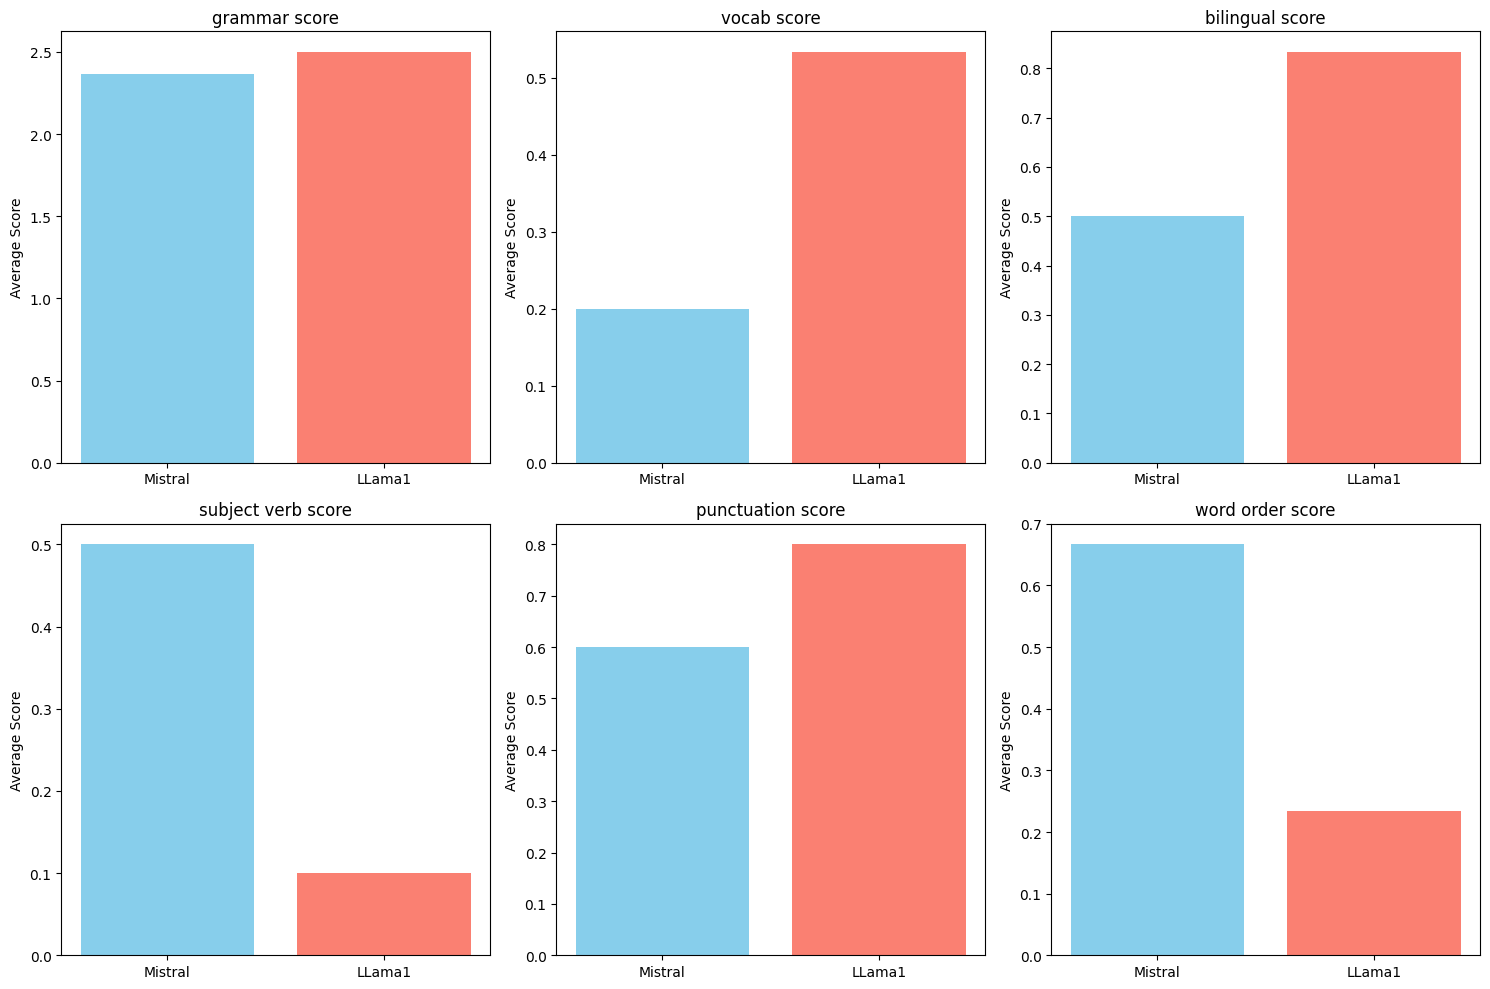

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Selecting data for each grammatical category and plotting in subplots
for i, category in enumerate(grammar_col_list):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.bar(['Mistral', 'LLama1'], [grammar_df_avg[f'Mistral_{category}'], grammar_df_avg[f'LLama1_{category}']], color=['skyblue', 'salmon'])
    ax.set_title(f'{category.replace("_", " ")}')
    ax.set_ylabel('Average Score')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

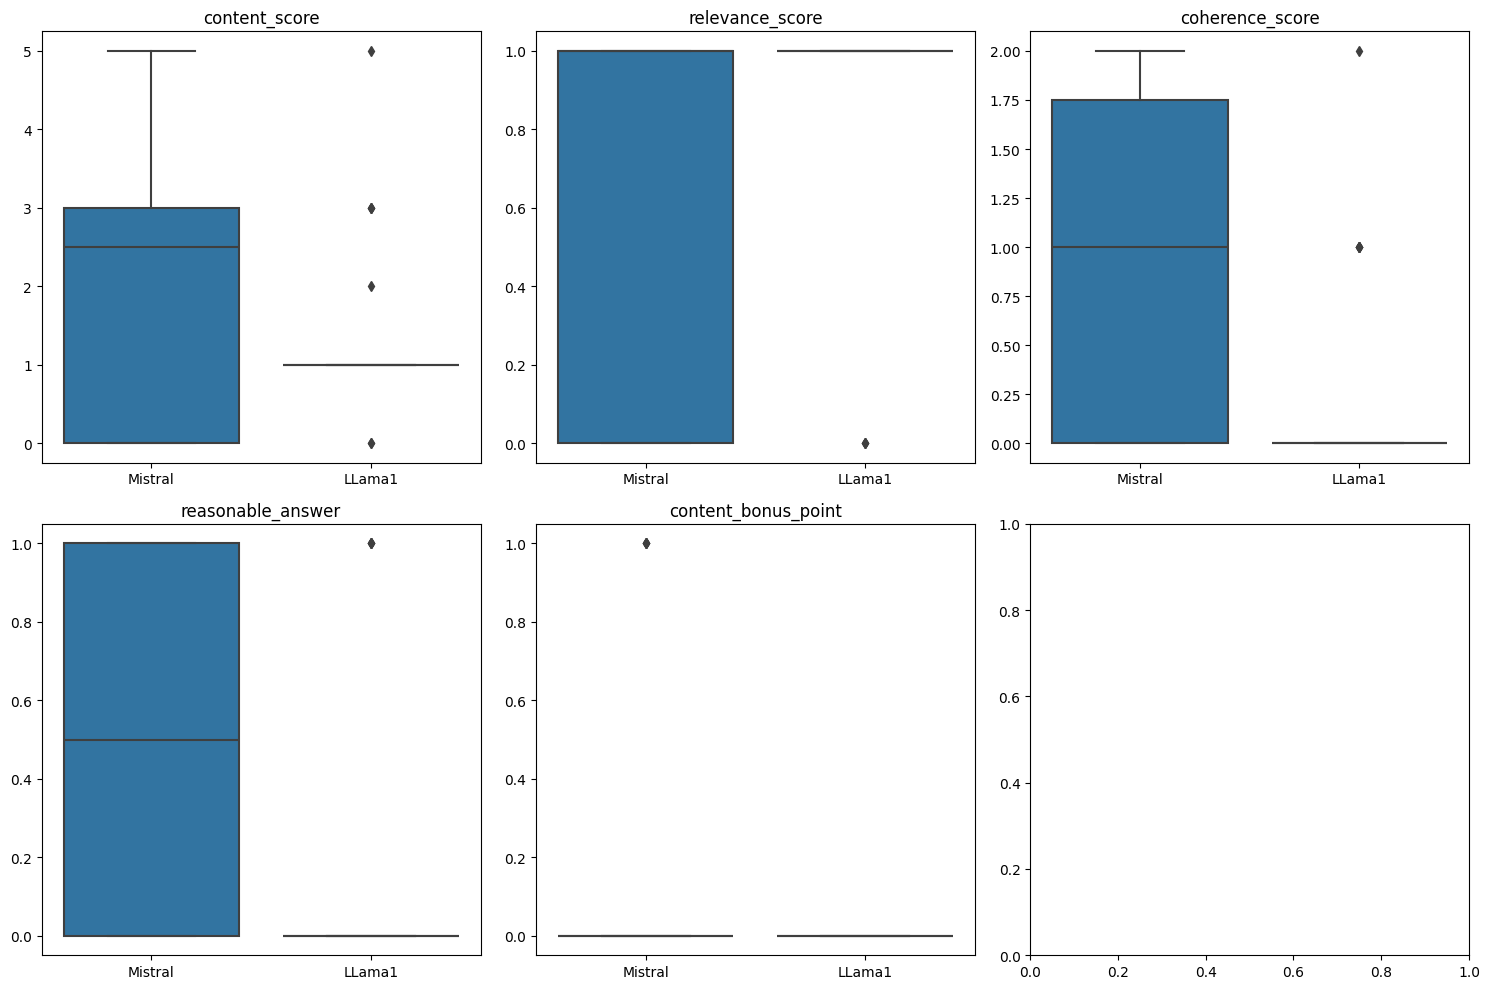

In [38]:

# Concatenate the two dataframes for easier plotting
combined_content_df = pd.concat([mistral_content_df.add_prefix('Mistral_'), llama1_content_df.add_prefix('LLama1_')], axis=1)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through each column (grammatical category)
for i, column in enumerate(content_col_list):
    ax = axes[i//3, i%3]
    sns.boxplot(data=combined_content_df[[f'Mistral_{column}', f'LLama1_{column}']], ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(['Mistral', 'LLama1'])

plt.tight_layout()
plt.show()

In [39]:
content_df_avg = combined_content_df.mean()

In [41]:
content_df_avg

Mistral_content_score          2.166667
Mistral_relevance_score        0.633333
Mistral_coherence_score        0.900000
Mistral_reasonable_answer      0.500000
Mistral_content_bonus_point    0.133333
LLama1_content_score           1.300000
LLama1_relevance_score         0.900000
LLama1_coherence_score         0.233333
LLama1_reasonable_answer       0.133333
LLama1_content_bonus_point     0.000000
dtype: float64

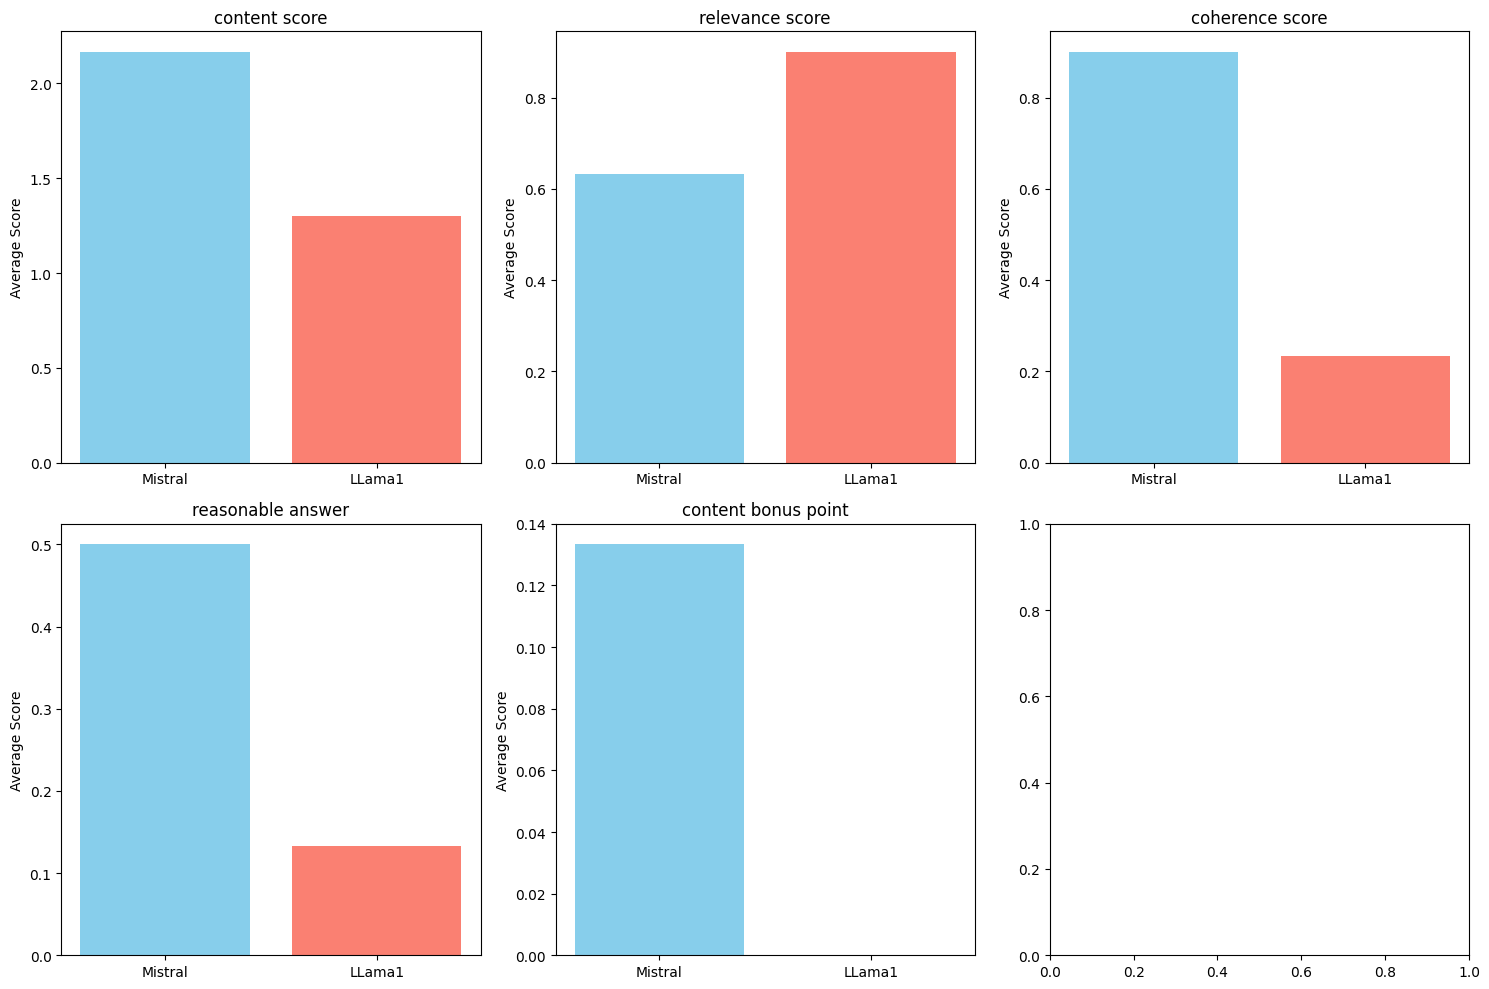

In [42]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Selecting data for each grammatical category and plotting in subplots
for i, category in enumerate(content_col_list):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.bar(['Mistral', 'LLama1'], [content_df_avg[f'Mistral_{category}'], content_df_avg[f'LLama1_{category}']], color=['skyblue', 'salmon'])
    ax.set_title(f'{category.replace("_", " ")}')
    ax.set_ylabel('Average Score')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [30]:
avg_score_dict

{'mistral_relevance_score': 0.6333333333333333,
 'mistral_coherence_score': 0.9,
 'mistral_reasonable_answer': 0.5,
 'mistral_content_bonus_point': 0.13333333333333333,
 'mistral_vocab_score': 0.2,
 'mistral_bilingual_score': 0.5,
 'mistral_subject_verb_score': 0.5,
 'mistral_word_order_score': 0.6666666666666666,
 'mistral_punctuation_score': 0.6,
 'mistral_grammar_score': 2.3666666666666667,
 'mistral_content_score': 2.066666666666667,
 'llama1_relevance_score': 0.9,
 'llama1_coherence_score': 0.23333333333333334,
 'llama1_reasonable_answer': 0.13333333333333333,
 'llama1_content_bonus_point': 0.0,
 'llama1_vocab_score': 0.5333333333333333,
 'llama1_bilingual_score': 0.8333333333333334,
 'llama1_subject_verb_score': 0.1,
 'llama1_word_order_score': 0.23333333333333334,
 'llama1_punctuation_score': 0.8,
 'llama1_grammar_score': 2.5,
 'llama1_content_score': 1.3}

In [31]:
#Create a dictionary that maps each column's name to the mean of the column
median_score_dict = {col: isolated_score_df[col].median() for col in isolated_score_df.columns}

In [32]:
median_score_dict

{'mistral_relevance_score': 1.0,
 'mistral_coherence_score': 1.0,
 'mistral_reasonable_answer': 0.5,
 'mistral_content_bonus_point': 0.0,
 'mistral_vocab_score': 0.0,
 'mistral_bilingual_score': 0.5,
 'mistral_subject_verb_score': 0.5,
 'mistral_word_order_score': 1.0,
 'mistral_punctuation_score': 1.0,
 'mistral_grammar_score': 3.0,
 'mistral_content_score': 2.5,
 'llama1_relevance_score': 1.0,
 'llama1_coherence_score': 0.0,
 'llama1_reasonable_answer': 0.0,
 'llama1_content_bonus_point': 0.0,
 'llama1_vocab_score': 1.0,
 'llama1_bilingual_score': 1.0,
 'llama1_subject_verb_score': 0.0,
 'llama1_word_order_score': 0.0,
 'llama1_punctuation_score': 1.0,
 'llama1_grammar_score': 3.0,
 'llama1_content_score': 1.0}